In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from numpy.fft import fft, fftfreq, ifft

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

In [35]:
print(df)

                       eMeter  eMeterReturn  eMeterLow  eMeterLowReturn  \
datetime                                                                  
2017-04-24 12:00:00   778.058           0.0    736.961              0.0   
2017-04-24 13:00:00   778.207           0.0    736.961              0.0   
2017-04-24 14:00:00   778.418           0.0    736.961              0.0   
2017-04-24 15:00:00   778.570           0.0    736.961              0.0   
2017-04-24 16:00:00   778.750           0.0    736.961              0.0   
2017-04-24 17:00:00   779.573           0.0    736.961              0.0   
2017-04-24 18:00:00   780.418           0.0    736.961              0.0   
2017-04-24 19:00:00   781.368           0.0    736.961              0.0   
2017-04-24 20:00:00   782.373           0.0    736.961              0.0   
2017-04-24 21:00:00   782.528           0.0    736.961              0.0   
2017-04-24 22:00:00   782.770           0.0    736.961              0.0   
2017-04-24 23:00:00   782

In [36]:
sample_rate = '1h'
def resample_df(df,sample_rate):
    
    input_df = df
    to_last = ['gasMeter','eMeter']
    input_df[to_last] = input_df[to_last].resample(sample_rate).last()
    input_df = input_df.resample(sample_rate).mean()
    
    return(input_df)

rdf=resample_df(df,sample_rate)

rdftrain = rdf[:]
rdftrain = rdftrain[rdftrain['T'] < 16]
rdfval = rdf[(25):]

bias = rdf[rdf['T'] > 16.5]
bias = bias['gasPower'].mean()

In [37]:
t = rdf.index[4500:4668]
gas = rdf['gasPower'][4500:4668]

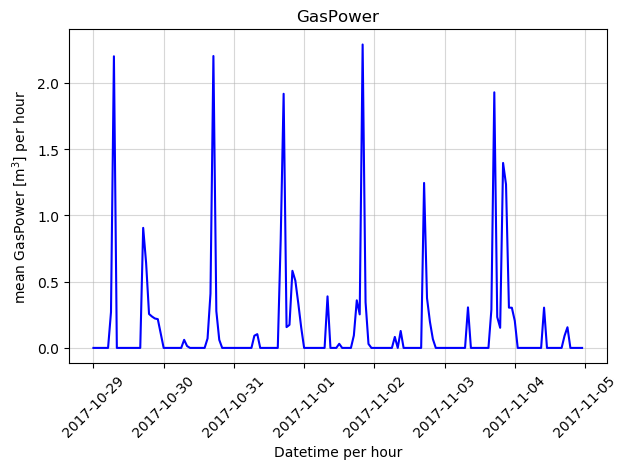

In [39]:
plt.title('GasPower')

plt.plot(t,gas, '-', color='b', ms=10)
plt.ylabel('mean GasPower [m$^3$] per hour')
plt.xlabel('Datetime per hour')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

plt.savefig('hourbooleans.png', dpi=700)

In [40]:
#https://stackoverflow.com/questions/8573702/units-of-frequency-when-using-fft-in-numpy
